In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy,math
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

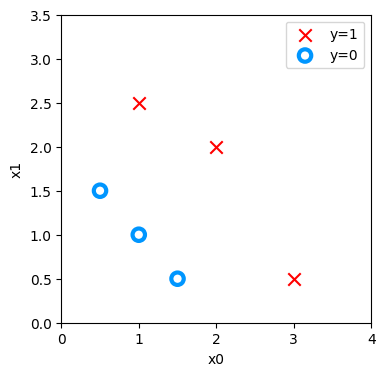

In [2]:
x_train=np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train=np.array([0,0,0,1,1,1])

fig,ax=plt.subplots(1,1,figsize=(4,4))
plot_data(x_train,y_train,ax)

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.axis([0,4,0,3.5])
plt.show()

In [3]:
def compute_logistic_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros(n)
    dj_db=0
    
    for i in range(m):
        f_wb_i=sigmoid(np.dot(x[i],w)+b)
        error_i=f_wb_i-y[i]
        
        for j in range(n):
            dj_dw[j]=dj_dw[j]+error_i*x[i,j]
        dj_db=dj_db+error_i
            
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db        

In [6]:
w=[2.,3.]
b=1.
dj_dw,dj_db=compute_logistic_gradient(x_train,y_train,w,b)
print(f'dj_dw={dj_dw.tolist()}\ndj_db={dj_db}')

dj_dw=[0.498333393278696, 0.49883942983996693]
dj_db=0.49861806546328574


In [7]:
#Gradient descent

def logistic_gradient_descent(x,y,w_in,b_in,a,n):
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    
    for i in range(n):
        dj_dw,dj_db=compute_logistic_gradient(x,y,w,b)
        
        w=w-a*dj_dw
        b=b-a*dj_db
    
        if i<999999:
            J_history.append(compute_cost_logistic(x,y,w,b))
            
        if i%math.ceil(n/10)==0:
            print(f'Iteration{i:4d}:   Cost = {J_history[-1]}')
            
    
    return w,b,J_history

In [8]:
w=np.zeros_like(x_train[0])
b=0.
a=0.1
n=10000

w_out,b_out,J_history=logistic_gradient_descent(x_train,y_train,w,b,a,n)
print(f'w_out={w_out}\nb_out={b_out}')

Iteration   0:   Cost = 0.684610468560574
Iteration1000:   Cost = 0.1590977666870457
Iteration2000:   Cost = 0.08460064176930078
Iteration3000:   Cost = 0.05705327279402531
Iteration4000:   Cost = 0.04290759421682
Iteration5000:   Cost = 0.03433847729884557
Iteration6000:   Cost = 0.02860379802212006
Iteration7000:   Cost = 0.02450156960879306
Iteration8000:   Cost = 0.02142370332569295
Iteration9000:   Cost = 0.019030137124109114
w_out=[5.28 5.08]
b_out=-14.222409982019837


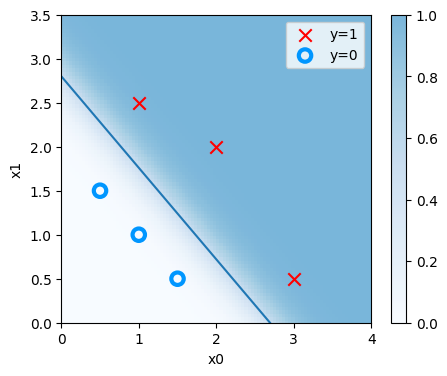

In [9]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
#plotting the probability
plt_prob(ax,w_out,b_out)

#Plotting the original data
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.axis([0,4,0,3.5])
plot_data(x_train,y_train,ax)

#Plotting decision boundary
x0=-b_out/w_out[0]
x1=-b_out/w_out[1]

ax.plot([0,x0],[x1,0])
plt.show()